In [1]:
import numpy as np
import pandas as pd
import glob
import cv2
from cv2 import imshow
import matplotlib.pyplot as plt
import os
from PIL import Image, ImageOps
from google.colab import files
from random import shuffle
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from keras import models, layers
import keras
from keras.regularizers import l2


IMG_SIZE = 150



In [2]:
!pip install tflearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 107 kB 8.4 MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=f9f2e284104ff3c4c14f75fa5281d07e1b4247f5d989e239cd2c191eaa0a1669
  Stored in directory: /root/.cache/pip/wheels/5f/14/2e/1d8e28cc47a5a931a2fb82438c9e37ef9246cc6a3774520271
Successfully built tflearn


In [3]:

import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression


Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
%tensorflow_version 1.x
import tensorflow as tf

print(tf.__version__)

TensorFlow is already loaded. Please restart the runtime to change versions.
2.8.0


In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


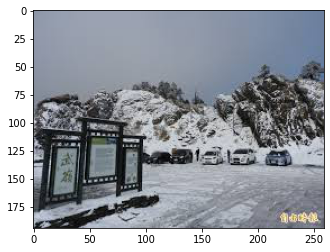

In [6]:
img = Image.open("/content/gdrive/My Drive/[NN'22] Project Dataset/Test/test_1.jpg")
data = np.asarray(img)
plt.imshow(img)

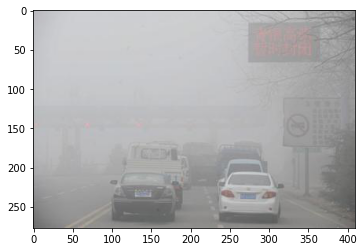

In [7]:
img = Image.open("/content/gdrive/My Drive/[NN'22] Project Dataset/Train/fogsmog/fogsmog_1.jpg")
data = np.asarray(img)
plt.imshow(img)

In [8]:
directory = "/content/gdrive/My Drive/[NN'22] Project Dataset/Train/dew"   


print(len(os.listdir(directory))) 

557


In [ ]:
# def create_label(image_name):
#     """ Create an one-hot encoded vector from image name """
   
#     if image_name == 'dew':
#         return np.array([1,0,0,0,0,0,0,0,0,0,0])
#     elif image_name == 'fogsmog':
#         return np.array([0,1,0,0,0,0,0,0,0,0,0])
#     elif image_name == 'frost':
#         return np.array([0,0,1,0,0,0,0,0,0,0,0])
#     elif image_name == 'glaze':
#         return np.array([0,0,0,1,0,0,0,0,0,0,0])
#     elif image_name == 'hail':
#         return np.array([0,0,0,0,1,0,0,0,0,0,0])
#     elif image_name == 'lightning':
#         return np.array([0,0,0,0,0,1,0,0,0,0,0])
#     elif image_name == 'rain':
#         return np.array([0,0,0,0,0,0,1,0,0,0,0])
#     elif image_name == 'rainbow':
#         return np.array([0,0,0,0,0,0,0,1,0,0,0])
#     elif image_name == 'rime':     
#         return np.array([0,0,0,0,0,0,0,0,1,0,0])
#     elif image_name == 'sandstorm':
#         return np.array([0,0,0,0,0,0,0,0,0,1,0])
#     elif image_name == 'snow':
#         return np.array([0,0,0,0,0,0,0,0,0,0,1])

In [9]:
# Display folder names and size of images in each folder
folders = []
folder_count = []
counter = 0
  
for FolderName in sorted(os.listdir("/content/gdrive/MyDrive/[NN'22] Project Dataset/Train")):  #folder name -> dew, snow keda
  folders.append(FolderName)
  inputPath = os.path.join("/content/gdrive/MyDrive/[NN'22] Project Dataset/Train", FolderName)

  for img in (sorted(os.listdir(inputPath))):      #folder (dew)   500 500 1
    counter +=1

  folder_count.append(counter)
  counter = 0                                     # basafar el counter before counting the new folder size
  
print(folders)
print(folder_count)

['dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'sandstorm', 'snow']
[557, 750, 334, 538, 450, 276, 385, 131, 1059, 551, 520]


In [10]:
def create_y_train():    #y -> 11 columns 1 row     -    Create an one-hot encoded vector from image name
  folder_count = 0
  rows_count = 0
  y = np.array(np.zeros((5551 , 11)))
  for FolderName in sorted(os.listdir("/content/gdrive/MyDrive/[NN'22] Project Dataset/Train")):
    inputPath = os.path.join("/content/gdrive/MyDrive/[NN'22] Project Dataset/Train", FolderName)
    len_class = len(os.listdir(inputPath))                 #510...  each folder size

    print(inputPath)
    y[rows_count:(rows_count+len_class),folder_count] =1
    rows_count += len_class
    folder_count +=1
  return y

In [11]:
def create_train_data():
  train = []
  IMG_IDX = 0
  rim_count=1100
  y = create_y_train()

  for FolderName in sorted(os.listdir("/content/gdrive/MyDrive/[NN'22] Project Dataset/Train")):  #folder name -> dew, snow keda

    inputPath = os.path.join("/content/gdrive/MyDrive/[NN'22] Project Dataset/Train", FolderName) 
    for img in (sorted(os.listdir(inputPath))):               #folder (dew)   500 500 1

      Img_Path = os.path.join(inputPath, img)
      img_data = cv2.imread(Img_Path,1)     
               # rgb - 0-> grayscale
      if(Img_Path=="/content/gdrive/MyDrive/[NN'22] Project Dataset/Train/fogsmog/fogsmog_495.jpg"):
        continue
      
        
      else:

        img_data = cv2.resize((img_data), (IMG_SIZE, IMG_SIZE))
        train.append([(img_data),y[IMG_IDX,:]])              # img (array of pixels) - y label (1 row - 11 col)
        IMG_IDX +=1
  
  return train
  


In [12]:
train = create_train_data()


/content/gdrive/MyDrive/[NN'22] Project Dataset/Train/dew
/content/gdrive/MyDrive/[NN'22] Project Dataset/Train/fogsmog
/content/gdrive/MyDrive/[NN'22] Project Dataset/Train/frost
/content/gdrive/MyDrive/[NN'22] Project Dataset/Train/glaze
/content/gdrive/MyDrive/[NN'22] Project Dataset/Train/hail
/content/gdrive/MyDrive/[NN'22] Project Dataset/Train/lightning
/content/gdrive/MyDrive/[NN'22] Project Dataset/Train/rain
/content/gdrive/MyDrive/[NN'22] Project Dataset/Train/rainbow
/content/gdrive/MyDrive/[NN'22] Project Dataset/Train/rime
/content/gdrive/MyDrive/[NN'22] Project Dataset/Train/sandstorm
/content/gdrive/MyDrive/[NN'22] Project Dataset/Train/snow


In [13]:
len(train)
s=np.array(train)
s.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


(5550, 2)

In [14]:
img_names=[]
def create_test_data():
  test = []
  
  for ImgName in sorted(os.listdir("/content/gdrive/MyDrive/[NN'22] Project Dataset/Test")):
    ImgPath = os.path.join("/content/gdrive/MyDrive/[NN'22] Project Dataset/Test", ImgName)
    img_names.append(ImgName)
    imgdata = cv2.imread(ImgPath, 1)
    
    if(ImgPath=="/content/gdrive/MyDrive/[NN'22] Project Dataset/Test/test_1297.jpg"):
      imgdata = cv2.imread("/content/gdrive/MyDrive/[NN'22] Project Dataset/Test/test_1.jpg", 1)
      
      imgdata = cv2.resize(np.array(imgdata), (IMG_SIZE, IMG_SIZE))
      test.append(np.array(imgdata))
      continue

    else:
      
      imgdata = cv2.resize(np.array(imgdata), (IMG_SIZE, IMG_SIZE))
      test.append(np.array(imgdata))

  return test


In [15]:
test = create_test_data()
test=np.array(test)
print(test.shape)

(1300, 150, 150, 3)


In [16]:
print(img_names)

['test_1.jpg', 'test_10.jpg', 'test_100.jpg', 'test_1000.jpg', 'test_1001.jpg', 'test_1002.jpg', 'test_1003.jpg', 'test_1004.jpg', 'test_1005.jpg', 'test_1006.jpg', 'test_1007.jpg', 'test_1008.jpg', 'test_1009.jpg', 'test_101.jpg', 'test_1010.jpg', 'test_1011.jpg', 'test_1012.jpg', 'test_1013.jpg', 'test_1014.jpg', 'test_1015.jpg', 'test_1016.jpg', 'test_1017.jpg', 'test_1018.jpg', 'test_1019.jpg', 'test_102.jpg', 'test_1020.jpg', 'test_1021.jpg', 'test_1022.jpg', 'test_1023.jpg', 'test_1024.jpg', 'test_1025.jpg', 'test_1026.jpg', 'test_1027.jpg', 'test_1028.jpg', 'test_1029.jpg', 'test_103.jpg', 'test_1030.jpg', 'test_1031.jpg', 'test_1032.jpg', 'test_1033.jpg', 'test_1034.jpg', 'test_1035.jpg', 'test_1036.jpg', 'test_1037.jpg', 'test_1038.jpg', 'test_1039.jpg', 'test_104.jpg', 'test_1040.jpg', 'test_1041.jpg', 'test_1042.jpg', 'test_1043.jpg', 'test_1044.jpg', 'test_1045.jpg', 'test_1046.jpg', 'test_1047.jpg', 'test_1048.jpg', 'test_1049.jpg', 'test_105.jpg', 'test_1050.jpg', 'test_1

In [17]:
# to prevent model overfitting & memorizing data
shuffle(train)

In [18]:
train[0]

[array([[[77, 77, 77],
         [79, 79, 79],
         [80, 80, 80],
         ...,
         [70, 72, 72],
         [66, 68, 68],
         [66, 68, 68]],
 
        [[78, 78, 78],
         [81, 81, 81],
         [81, 81, 81],
         ...,
         [69, 71, 71],
         [67, 69, 69],
         [66, 68, 68]],
 
        [[78, 78, 78],
         [81, 81, 81],
         [83, 83, 83],
         ...,
         [71, 72, 72],
         [68, 70, 70],
         [65, 67, 67]],
 
        ...,
 
        [[27, 46, 44],
         [12, 30, 29],
         [10, 28, 27],
         ...,
         [36, 48, 52],
         [41, 53, 57],
         [39, 51, 55]],
 
        [[28, 48, 46],
         [22, 41, 39],
         [11, 29, 26],
         ...,
         [34, 46, 50],
         [38, 50, 54],
         [27, 39, 43]],
 
        [[20, 41, 37],
         [26, 45, 42],
         [25, 42, 39],
         ...,
         [32, 44, 48],
         [37, 49, 53],
         [35, 47, 51]]], dtype=uint8),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0.

In [19]:
x_train = []
y_train = []
for idx in range (len(train)):
  pixels = train[idx][0]
  x_train.append(pixels)

for idx in range (len(train)):
  y_train.append(train[idx][1])
x_train = np.array(x_train)
y_train = np.array(y_train)

In [20]:
print(x_train.shape)
print(y_train.shape)

(5550, 150, 150, 3)
(5550, 11)


In [21]:
print(x_train[0])
y_train[0]

[[[77 77 77]
  [79 79 79]
  [80 80 80]
  ...
  [70 72 72]
  [66 68 68]
  [66 68 68]]

 [[78 78 78]
  [81 81 81]
  [81 81 81]
  ...
  [69 71 71]
  [67 69 69]
  [66 68 68]]

 [[78 78 78]
  [81 81 81]
  [83 83 83]
  ...
  [71 72 72]
  [68 70 70]
  [65 67 67]]

 ...

 [[27 46 44]
  [12 30 29]
  [10 28 27]
  ...
  [36 48 52]
  [41 53 57]
  [39 51 55]]

 [[28 48 46]
  [22 41 39]
  [11 29 26]
  ...
  [34 46 50]
  [38 50 54]
  [27 39 43]]

 [[20 41 37]
  [26 45 42]
  [25 42 39]
  ...
  [32 44 48]
  [37 49 53]
  [35 47 51]]]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [22]:
#Normalization (scaling the range of x between 0 and 1)
x_train = x_train / 255.0


In [23]:
test = np.array(test)
test.shape
test = test / 255.0


In [24]:
test[0]

array([[[0.64705882, 0.58039216, 0.54509804],
        [0.65098039, 0.58431373, 0.54901961],
        [0.65882353, 0.59215686, 0.55686275],
        ...,
        [0.61960784, 0.50196078, 0.42745098],
        [0.62352941, 0.49803922, 0.42352941],
        [0.62352941, 0.49803922, 0.42352941]],

       [[0.65098039, 0.58431373, 0.54901961],
        [0.65098039, 0.58431373, 0.54901961],
        [0.65882353, 0.59215686, 0.55686275],
        ...,
        [0.61960784, 0.50196078, 0.42745098],
        [0.62352941, 0.49803922, 0.42352941],
        [0.62352941, 0.49803922, 0.42352941]],

       [[0.65098039, 0.58431373, 0.54901961],
        [0.65490196, 0.58823529, 0.55294118],
        [0.65882353, 0.59215686, 0.55686275],
        ...,
        [0.61960784, 0.50196078, 0.42745098],
        [0.62352941, 0.49803922, 0.42352941],
        [0.62352941, 0.49803922, 0.42352941]],

       ...,

       [[0.70588235, 0.68627451, 0.65098039],
        [0.16862745, 0.14901961, 0.11372549],
        [0.08627451, 0

In [28]:
#VGG19
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import BatchNormalization
model = Sequential()
model.add(Convolution2D(64, 3, 3, activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)))

model.add(Convolution2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Convolution2D(filters=128,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Convolution2D(filters=128,kernel_size=(3,3),padding="same", activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))    
model.add(Convolution2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))

model.add(Convolution2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Convolution2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))

model.add(Convolution2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    
model.add(Convolution2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))

model.add(Convolution2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Convolution2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))

model.add(Convolution2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    
model.add(Convolution2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))

model.add(Convolution2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Convolution2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))

model.add(Convolution2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))


In [29]:
WEIGHTS_PATH_NO_TOP = ('https://github.com/fchollet/deep-learning-models/'
                       'releases/download/v0.1/'
                       'vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5')

weights_path = tf.keras.utils.get_file('vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5',WEIGHTS_PATH_NO_TOP)
model.load_weights(weights_path)

model.add(Flatten())

model.add(Dense(units=11, activation="softmax",kernel_regularizer='l2',bias_regularizer='l2'))

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(0.001),
    metrics=['accuracy']    
)
xt,xte,yt,yte=train_test_split(x_train, y_train,test_size=0.2,random_state=42)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', min_lr=0.00001)

history= model.fit(
     xt, yt,
     epochs=30,validation_data=(xte,yte),callbacks=[reduce_lr] )


model.summary()


Train on 4440 samples, validate on 1110 samples
Epoch 1/30
4440/4440 [==============================] - ETA: 0s - loss: 1.7907 - acc: 0.4599

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


4440/4440 [==============================] - 22s 5ms/sample - loss: 1.7907 - acc: 0.4599 - val_loss: 1.4222 - val_acc: 0.5820 - lr: 0.0010
Epoch 2/30
4440/4440 [==============================] - 9s 2ms/sample - loss: 1.2335 - acc: 0.6505 - val_loss: 1.2564 - val_acc: 0.6423 - lr: 0.0010
Epoch 3/30
4440/4440 [==============================] - 9s 2ms/sample - loss: 1.0294 - acc: 0.7214 - val_loss: 0.9924 - val_acc: 0.7252 - lr: 0.0010
Epoch 4/30
4440/4440 [==============================] - 9s 2ms/sample - loss: 0.9207 - acc: 0.7624 - val_loss: 1.1563 - val_acc: 0.7090 - lr: 0.0010
Epoch 5/30
4440/4440 [==============================] - 9s 2ms/sample - loss: 0.8364 - acc: 0.7908 - val_loss: 0.8986 - val_acc: 0.7685 - lr: 0.0010
Epoch 6/30
4440/4440 [==============================] - 9s 2ms/sample - loss: 0.7659 - acc: 0.8083 - val_loss: 0.9430 - val_acc: 0.7613 - lr: 0.0010
Epoch 7/30
4440/4440 [==============================] - 9s 2ms/sample - loss: 0.7216 - acc: 0.8230 - val_loss: 0.906

In [30]:
# Testing

df_test = pd.DataFrame ({ "image_name" :   img_names  })

prediction = model.predict(test)

df_test["label"] = np.argmax(prediction,axis=1)                        # final carries the index value of the max prob class of each row/ img 


print(df_test["label"].value_counts())


#print(f"Dew: {prediction[0]}, fogsmog: {prediction[1]}, Frost: {prediction[2]}, Glaze: {prediction[3]}, Hail: {prediction[4]}, Lightning: {prediction[5]}, Rain: {prediction[6]}, Rainbow: {prediction[7]}, Rime: {prediction[8]}, Sandstorm: {prediction[9]}, Snow: {prediction[10]}")

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


4     150
0     139
9     135
6     133
8     123
1     116
3     116
2     105
5      98
10     97
7      88
Name: label, dtype: int64


In [31]:
#df_test.to_csv('last.csv', index=False)

In [32]:
#from google.colab import files
#files.download("last.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
# # CNN - Highest  0.76%
# #Notes

# model=keras.models.Sequential([
# keras.layers.Conv2D( 32, 3, activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
# keras.layers.BatchNormalization(),

# keras.layers.MaxPool2D( 2),

# keras.layers.Conv2D( 32, 3, activation='relu'),
# keras.layers.BatchNormalization(),

# keras.layers.MaxPool2D( 2),
# keras.layers.Dropout(0.3),

# keras.layers.Conv2D( 32, 3, activation='relu'),
# keras.layers.BatchNormalization(),

# keras.layers.MaxPool2D( 2),

# keras.layers.Conv2D( 64, 3, activation='relu'),
# keras.layers.BatchNormalization(),

# keras.layers.MaxPool2D( 2),
# keras.layers.Dropout(0.3),

# keras.layers.Conv2D( 128, 2, activation='relu'),
# keras.layers.BatchNormalization(),
# keras.layers.MaxPool2D( 2),

# keras.layers.Flatten(),
# keras.layers.Dense(700,activation='relu',kernel_regularizer='l2',bias_regularizer='l2'),
# keras.layers.Dropout(0.4),
# keras.layers.Dense(11,activation='softmax',kernel_regularizer='l2',bias_regularizer='l2')
# ])

# model.compile(
#     loss=categorical_smooth_loss,
#     optimizer=tf.keras.optimizers.Adam(0.0007),
#     metrics=['accuracy']    
# )
#  xt,xte,yt,yte=train_test_split(x_train, y_train,test_size=0.2,random_state=42)
# callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=12)
# reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', min_lr=0.0000001,patience=5)
# history= model.fit(
#      xt, yt,
#      epochs=50,batch_size=32,validation_data=(xte,yte),callbacks=[reduce_lr] )


# model.summary()




In [34]:
# Model 1 - ALEXNET
# input_conv = input_data(shape=[None, 227, 227, 3], name='input')

# conv_1 = conv_2d(input_conv,96,11,strides=4,activation='relu')
# pool_1 = max_pool_2d(conv_1,3,strides=2)

# conv_2 = conv_2d(pool_1,256,5,activation='relu')
# pool_2 = max_pool_2d(conv_2,3,strides=2)

# conv_3 = conv_2d(pool_2,384,3,activation='relu')
# conv_4 = conv_2d(conv_3,384,3,activation='relu')
# conv_5 = conv_2d(conv_4,256,3,activation='relu')

# pool_3 = max_pool_2d(conv_5,3,strides=2)
# fully_layer1 = fully_connected(pool_3, 4096, activation='relu')
# fully_layer2 = fully_connected(fully_layer1, 4096, activation='relu')

# cnn_layers = fully_connected(fully_layer2, 11, activation='softmax')
# cnn_layers = regression(cnn_layers, optimizer='SGD', learning_rate=0.1, loss='categorical_crossentropy', name='targets')

# model = tflearn.DNN(cnn_layers, tensorboard_dir='log', tensorboard_verbose=3)

# model.fit({'input': x_train}, {'targets': y_train}, batch_size=64 ,n_epoch=10,
#           validation_set=({'input': x_test}, {'targets': y_test}),
#           run_id='Weather-classification')

# # history=model.fit(
# #     x_train,
# #      y_train,
# #      batch_size=60,
# #     epochs=50,
# #     validation_data=(x_test,y_test),
# # )

# model.save('NNmodel.tfl')